In [14]:
import numpy as np

thetas=np.linspace(0,1,1001)
print(len(theta))
print(type(theta))

1001
<class 'numpy.ndarray'>


In [15]:
likelihood=lambda r:thetas if r else (1-thetas)

def posterior(r,prior):
    lp=likelihood(r)*prior
    return lp/lp.sum()


In [21]:
p=np.array([1/len(thetas) for _ in thetas])
print(p)
pos=posterior(1,p)
print(pos)

[0.000999 0.000999 0.000999 ... 0.000999 0.000999 0.000999]
[0.00000000e+00 1.99800200e-06 3.99600400e-06 ... 1.99400599e-03
 1.99600400e-03 1.99800200e-03]


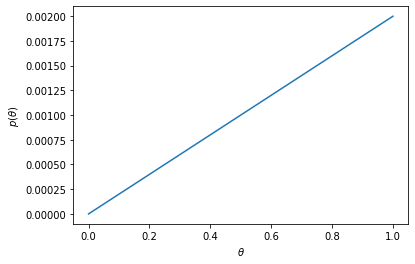

In [28]:
from matplotlib import pyplot as plt
plt.plot(thetas,pos)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta)$")
plt.show()



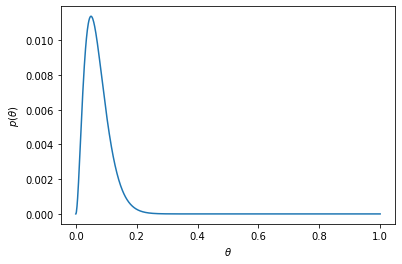

In [32]:
clicks=2
nonclicks=38
#prior
p=np.array([1/len(thetas) for _ in thetas])
for _ in range(clicks):
    p=posterior(1,p)
    
for _ in range(nonclicks):
    p=posterior(0,p)
plt.plot(thetas,p)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta)$")
plt.show()



(0.0, 0.2)

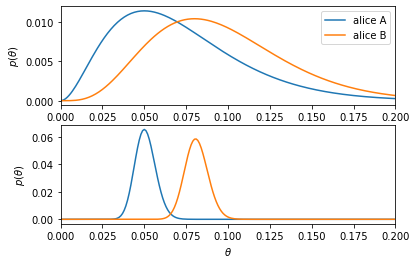

In [35]:
likelihood=lambda a,N:thetas**a*(1-thetas)**(N-a)
def posterior(a,N,prior):
    lp=likelihood(a,N)*prior
    return lp/lp.sum()

prior=1/len(thetas)
plt.subplot(2,1,1)
plt.plot(thetas,posterior(2,40,prior),label="alice A")
plt.plot(thetas,posterior(4,50,prior),label="alice B")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta)$")
plt.xlim(0,0.2)
plt.legend()
plt.subplot(2,1,2)
plt.plot(thetas,posterior(64,1280,prior),label="alice A")
plt.plot(thetas,posterior(129,1600,prior),label="alice B")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta)$")
plt.xlim(0,0.2)

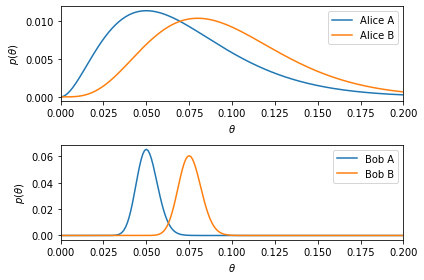

In [41]:
def betaf(alpha,beta):
    numerator=thetas**(alpha-1)*(1-thetas)**(beta-1)
    return numerator/numerator.sum()

def posterior(a,N):
    return betaf(a+1,N-a+1)


plt.subplot(2,1,1)
plt.plot(thetas,posterior(2,40),label="Alice A")
plt.plot(thetas,posterior(4,50),label="Alice B")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta)$")
plt.xlim(0,0.2)
plt.legend()
plt.subplot(2,1,2)
plt.plot(thetas,posterior(64,1280),label="Bob A")
plt.plot(thetas,posterior(120,1600),label="Bob B")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta)$")
plt.xlim(0,0.2)
plt.legend()
plt.tight_layout()
plt.show()

In [46]:
thetas=np.linspace(0,1,1001)
def hmv(xs,ps,alpha=0.95):
    xps=sorted(zip(xs,ps),key=lambda xp:xp[1],reverse=True)
    xps=np.array(xps)
    xs=xps[;,0]
    ps=xps[:,1]
    return np.sort(xs[np.cumsum(ps)<alpha])

def posterior(a,N):
    alpha=a+1
    beta=N-a+1
    numerator=thetas**(alpha-1)*(1-thetas)**(beta-1)
    return numerator/numerator.sum()

ps=posterior(2,40)
print(ps)
print(type(ps))
hm_thetas=hmv(thetas,ps,alpha=0.95)
plt.plot(thetas,ps)
plt.annotate("",xy=(hm_thetas.min(),0),xytext=(hm_thetas.max(),0))9-

SyntaxError: invalid syntax (<ipython-input-46-890dd1d44cda>, line 13)

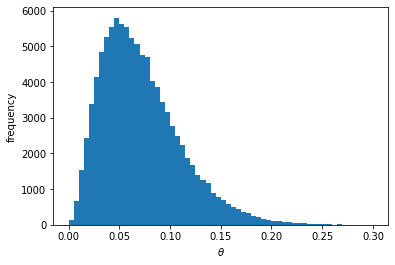

In [48]:
import numpy as np
data=np.random.beta(3,39,size=100000)
plt.hist(data,range=(0,0.3),bins=60)
plt.xlabel(r"$\theta$")
plt.ylabel(r"frequency")
plt.show()